From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this hackathon, Data Science and Machine Learning enthusiasts like you will use Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

# FEATURES:

## STORY:  A part of the main content of the article to be published as a piece of news.
## SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

* Politics: 0
* Technology: 1
* Entertainment: 2
* Business: 3

In [71]:
import pandas as pd
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
traindf = pd.read_csv("Downloads\\Capstone_Projects\\Predict News Category\\TrainDataset.csv")
testdf = pd.read_csv("Downloads\\Capstone_Projects\\Predict News Category\\TestDataset.csv")

In [3]:
traindf.head()

,STORY,SECTION
0,The roadshow and the filing of nomination pape...,0
1,These vulnerabilities could have allowed hacke...,1
2,"""People will now be able to include music in t...",1
3,Jersey is expected to have a good start at the...,2
4,Xiaomi’s unveiling also hints at how Samsung i...,1


In [4]:
testdf.head()

,STORY
0,Privileged to have done this candid and COMPLE...
1,6) Some analysts expect volatility to remain h...
2,There is no stopping Marvel Cinematic Universe...
3,"According to Ravi Menon, analyst at Elara Secu..."
4,"A complaint against Nadiadwala, known for prod..."


In [5]:
traindf.shape, testdf.shape

((6102, 2), (1526, 1))

In [6]:
traindf.info()
print()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 2 columns):
STORY      6102 non-null object
SECTION    6102 non-null int64
dtypes: int64(1), object(1)
memory usage: 95.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 1 columns):
STORY    1526 non-null object
dtypes: object(1)
memory usage: 12.0+ KB


In [7]:
traindf.groupby('SECTION').describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1341   1333  This story has been published from a wire agen...    4
1        2224   2196  This story has been published from a wire agen...   13
2        1524   1515  We will leave no stone unturned to make the au...    3
3        1013   1004  This story has been published from a wire agen...    8

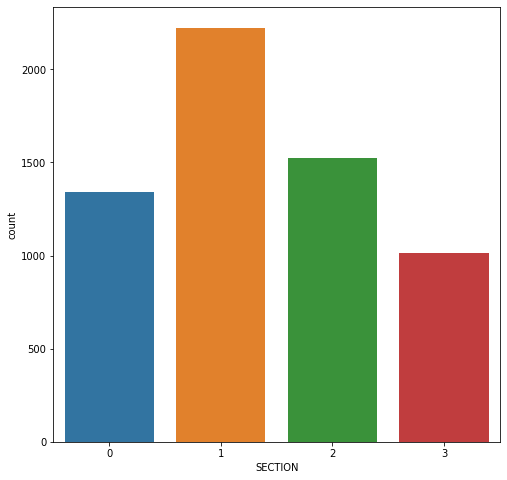

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(traindf['SECTION']);

<b>Inferences so far:</b>

1. The category or `SECTION` is to be predicted for the test data in which the news/`STORY` would fall.
2. `STORY` is object type and `SECTION` is numerical type. It's a classification problem.
3. Preprocessing and NLP has to be performed on `STORY` to make it machine readable, for prediction of category.
4. Most of the stories fall under `SECTION` `1`, depicted in orange.

<hr>

# Cleaning and Preprocessing

### Steps performed:

1. Removed duplicate rows
2. Converted words to lowercase
3. Removed punctuation
4. Removed stopwords
5. Performed lemmatization
6. Created WordClouds for train and test data

In [9]:
#Checking for duplicate rows

traindf[traindf.duplicated() == True]

,STORY,SECTION
645,The Redmi Note 7 comes with a 6.3-inch LCD dis...,1
679,This story has been published from a wire agen...,3
864,We will leave no stone unturned to make the au...,2
986,"The whole feels like a giant set, stately and ...",2
1007,This story has been published from a wire agen...,3
1182,We will leave no stone unturned to make the au...,2
1271,Cable landing stations or submarine cables are...,1
1467,This story has been published from a wire agen...,1
1861,Amazon has partnered with SBI to offer 10% dis...,1
1897,Guglielmo Marchetti of Notorious Pictures and ...,2


In [10]:
#Dropping duplicates so as to prevent it from skewing the results

traindf.drop_duplicates(keep='first', inplace=True)

In [11]:
traindf.shape

(6048, 2)

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zZE94\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zZE94\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
#Loading necessary data into variables

punc = string.punctuation + "’‘”"
stop_words = nltk.corpus.stopwords.words('english')
wnl = nltk.stem.WordNetLemmatizer()

In [14]:
def preprocess(x):
    """
    x: Input string
    
    Converts string to lowercase
    Removes punctuation from the string
    Converts string to list
    Removes stopwords
    Performs lemmatization
    
    Returns: list
    """
    x = x.lower()
    x = "".join([a for a in x if a not in punc])
    x = "".join([a for a in x if not a.isdigit()])
    x = x.split()
    x = [a for a in x if a not in stop_words]
    x = [wnl.lemmatize(a) for a in x]
    return x

In [15]:
#Applying the above function to train and test dataframe

traindf['STORY_NEW'] = traindf['STORY'].apply(preprocess)
testdf['STORY_NEW'] = testdf['STORY'].apply(preprocess)

In [16]:
#Concatenating all the words from the several lists into a single list for WordCloud

allwords = []
def concatwords(x):
    allwords.extend(x)

In [17]:
traindf['STORY_NEW'].apply(concatwords);

In [18]:
len(allwords)

379023

In [19]:
#Joining all the words in the list to a single string

allwords = ' '.join(allwords)

In [20]:
#Initialising WordCloud

wordcloud = WordCloud(background_color='white').generate(allwords)

In [21]:
allwords

'roadshow filing nomination paper also attempt show strength ruling bjp eastern region several minister ally party varanasi filing nomination expected friday bjp lok sabha seat region losing azamgarh samajwadi party patriarch mulayam singh yadav repeated performance assembly poll returned power uttar pradesh gap year bjp leader said modi visit varanasi every month meet resident last five year varanasi least time said finance minister arun jaitley tweeted modis roadshow culminated customary ganga aarti “expresses one indication—that pm “is well way repeating even increasing victory margin vulnerability could allowed hacker access sensitive information take control number smart home device platform like door lock security camera thermostat new delhi september major part internet east coast u went blink following biggest cyber attack history internet know mirai malware triggered internet thing iot botnet attack took big website including twitter guardian netflix reddit cnn two year later 

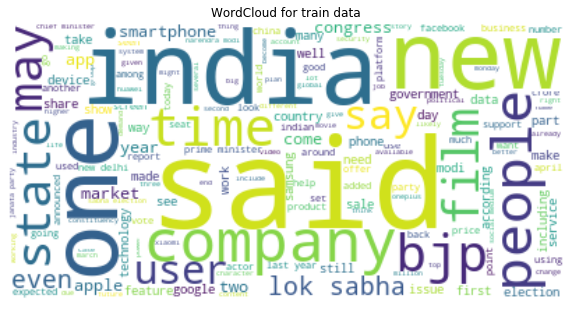

In [22]:
plt.figure(figsize=(10,10))
plt.title("WordCloud for train data")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

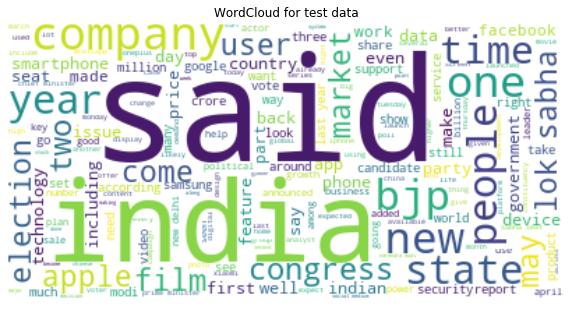

In [23]:
allwords = []
testdf['STORY_NEW'].apply(concatwords);
allwords = ' '.join(allwords)
wordcloud = WordCloud(background_color='white').generate(allwords)

plt.figure(figsize=(10,10))
plt.title("WordCloud for test data")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# TF-IDF

In [24]:
vectorizer = TfidfVectorizer()

In [25]:
#Converting list to string

def tostring(x):
    x = ' '.join([a for a in x])
    return x

traindf['STORY_NEW'] = traindf['STORY_NEW'].apply(tostring)
testdf['STORY_NEW'] = testdf['STORY_NEW'].apply(tostring)

In [26]:
full_text = list(traindf['STORY_NEW'].values) + list(testdf['STORY_NEW'].values)

In [28]:
vectorizer.fit(full_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [42]:
X_train = vectorizer.transform(traindf['STORY_NEW'])
X_test = vectorizer.transform(testdf['STORY_NEW'])

In [43]:
print(X_train)

  (0, 32033)	0.0904941104130574
  (0, 31995)	0.10552650588657476
  (0, 31469)	0.06494238399206008
  (0, 31368)	0.06765007612807004
  (0, 30987)	0.11232603449859345
  (0, 30810)	0.10552650588657476
  (0, 30588)	0.34279487414946536
  (0, 30469)	0.08512320025409481
  (0, 29670)	0.09600046035650385
  (0, 28994)	0.05215143139810533
  (0, 28709)	0.1189147658388004
  (0, 27542)	0.0961861362298832
  (0, 26204)	0.08339718169129022
  (0, 25946)	0.06742374602681306
  (0, 25615)	0.0779254872233888
  (0, 25259)	0.06500777662463814
  (0, 24799)	0.10490859770805448
  (0, 24710)	0.07805345165595516
  (0, 24632)	0.06317245959845981
  (0, 24554)	0.08637377010669385
  (0, 24321)	0.25042191813087306
  (0, 24052)	0.11531923632403118
  (0, 23904)	0.11099820035447619
  (0, 23791)	0.13859921901766217
  (0, 23789)	0.12341770754780435
  :	:
  (6047, 4823)	0.10076207345511572
  (6047, 4569)	0.05901373700630698
  (6047, 4498)	0.23607990176990928
  (6047, 4461)	0.07588240593994647
  (6047, 4303)	0.0651509006553852

In [44]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aadhaar',
 'aadhaarenabled',
 'aadhar',
 'aadhi',
 'aaditya',
 'aadmi',
 'aag',
 'aaghadi',
 'aahana',
 'aahun',
 'aahunthe',
 'aai',
 'aaj',
 'aakash',
 'aalaya',
 'aam',
 'aamchi',
 'aamchya',
 'aamhi',
 'aamir',
 'aamirkhan',
 'aanand',
 'aane',
 'aani',
 'aankh',
 'aao',
 'aap',
 'aapka',
 'aapki',
 'aapkinayiduniya',
 'aapko',
 'aaps',
 'aarakshan',
 'aaron',
 'aarti',
 'aartia',
 'aarudir',
 'aaryan',
 'aarzoo',
 'aasaan',
 'aashiq',
 'aashiqui',
 'aashish',
 'aashray',
 'aashwasana',
 'aastha',
 'aasu',
 'aata',
 'aatankwaad',
 'aate',
 'aatey',
 'aay',
 'aaya',
 'aayega',
 'aayi',
 'aayog',
 'aayogs',
 'aayush',
 'ab',
 'ababa',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abate',
 'abattoir',
 'abb',
 'abbas',
 'abbasmustans',
 'abbreviation',
 'abby',
 'abc',
 'abcl',
 'abdelaziz',
 'abdellatif',
 'abducting',
 'abducts',
 'abdul',
 'abdullah',
 'abdullahs',
 'abgnac',
 'abhay',
 'abheek',
 'abhi',
 'abhijit',
 'abhimanyu',
 'abhinandan',
 'abhi

In [45]:
y_train = traindf['SECTION']

<hr>

# Model Building

### Logistic Regression

In [51]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logreg.classes_

array([0, 1, 2, 3], dtype=int64)

In [58]:
logreg.coef_

array([[ 0.05564629, -0.02658071,  0.24879481, ..., -0.01627593,
        -0.01627593, -0.01627593],
       [-0.03816485,  0.01839535, -0.03589684, ..., -0.04163969,
        -0.04163969, -0.04163969],
       [-0.0465232 , -0.06293675, -0.07937202, ...,  0.08057485,
         0.08057485,  0.08057485],
       [ 0.01390431,  0.06016301, -0.07333121, ..., -0.01474681,
        -0.01474681, -0.01474681]])

In [60]:
y_train_pred = logreg.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 2, 2, 1], dtype=int64)

In [61]:
accuracy_score(y_train, y_train_pred)

0.9877645502645502

In [66]:
precision_score(y_train, y_train_pred, average=None)

array([0.98854962, 0.98687783, 0.98494764, 0.993     ])

In [68]:
recall_score(y_train, y_train_pred, average=None)

array([0.97149287, 0.9931694 , 0.99339934, 0.98904382])

In [70]:
confusion_matrix(y_train, y_train_pred)

array([[1295,   23,   13,    2],
       [   4, 2181,    6,    5],
       [  10,    0, 1505,    0],
       [   1,    6,    4,  993]], dtype=int64)

### Random Forest Classifier

In [72]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=2, n_estimators=50)

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
y_train_pred = rf.predict(X_train)

In [75]:
accuracy_score(y_train, y_train_pred)

0.4031084656084656

In [77]:
precision_score(y_train, y_train_pred, average=None)

array([1.        , 0.37822942, 1.        , 0.        ])

In [79]:
recall_score(y_train, y_train_pred, average=None)

array([0.18004501, 1.        , 0.00132013, 0.        ])

In [80]:
rf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
confusion_matrix(y_train, y_train_pred)

array([[ 240, 1093,    0,    0],
       [   0, 2196,    0,    0],
       [   0, 1513,    2,    0],
       [   0, 1004,    0,    0]], dtype=int64)

#### Results on test dataframe

In [85]:
y_test_predLR = logreg.predict(X_test)
y_test_predLR

array([2, 3, 2, ..., 1, 0, 2], dtype=int64)

In [86]:
y_test_predRF = rf.predict(X_test)
y_test_predRF

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<br>

### Conclusion:

1. Logistic Regression returns a much better accuracy than Random Forest Classifier does.
2. The output on test data is expected less of an error in the prediction made using Logistic Regression.

#### Conversion to CSV file

In [88]:
pd.DataFrame(y_test_predLR).to_csv("newscategorypredLR.csv", index=False)
pd.DataFrame(y_test_predRF).to_csv("newscategorypredRF.csv", index=False)